<a href="https://colab.research.google.com/github/rprestupa/PCA-Analisis-de-componentes-principales/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCA
Análisis de Componente Principales

La **dimensionalidad** de un set de datos es la cantidad de variables o atributos que contiene.

Muchas veces, cuando se cuenta con un conjunto de datos con una gran cantidad de atributos, es posible que algunas o varias de esas características estén correlacionadas entre sí o muestren información redundante.

Cuando se busca analizar los datos, ese exceso de atributos puede resultar poco beneficioso, dificultando la identificación de patrones significativos, o la visualización de los mismos a través de gráficos.

El PCA es una técnica de reducción de la dimensionalidad, o sea que permite reducir la cantidad de variables, sin perder información significativa. Esta reducción se logra combinando variables que sugieren estar correlacionadas entre sí, y obteniendo otras denominadas "componentes principales".

A continuación, se trabaja con un dataset que muestra características de masas halladas en el tejido mamario en pacientes en proceso diagnóstico. El conjunto de datos agrupa variables que describen las características de la masa observada a través de imágenes digitalizadas del tejido obtenido a partir de una punción, y el diagnóstico de la misma (maligna/beninga).

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import decomposition
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go #

In [ ]:
!pip install ydata-profiling

## Análisis exploratorio de los datos

In [3]:
cancer_data = load_breast_cancer()

ca_df = pd.DataFrame(data = cancer_data.data, columns = cancer_data.feature_names)
ca_df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
print(cancer_data['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [5]:
ca_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
from ydata_profiling import ProfileReport
profile = ProfileReport(ca_df, title="Estudio de masas en el tejido mamario", explorative=True)
profile.to_notebook_iframe()

Se utilizan boxplots para analizar mas en profundidad aquellas variables que
sugerían la presencia de outliers:

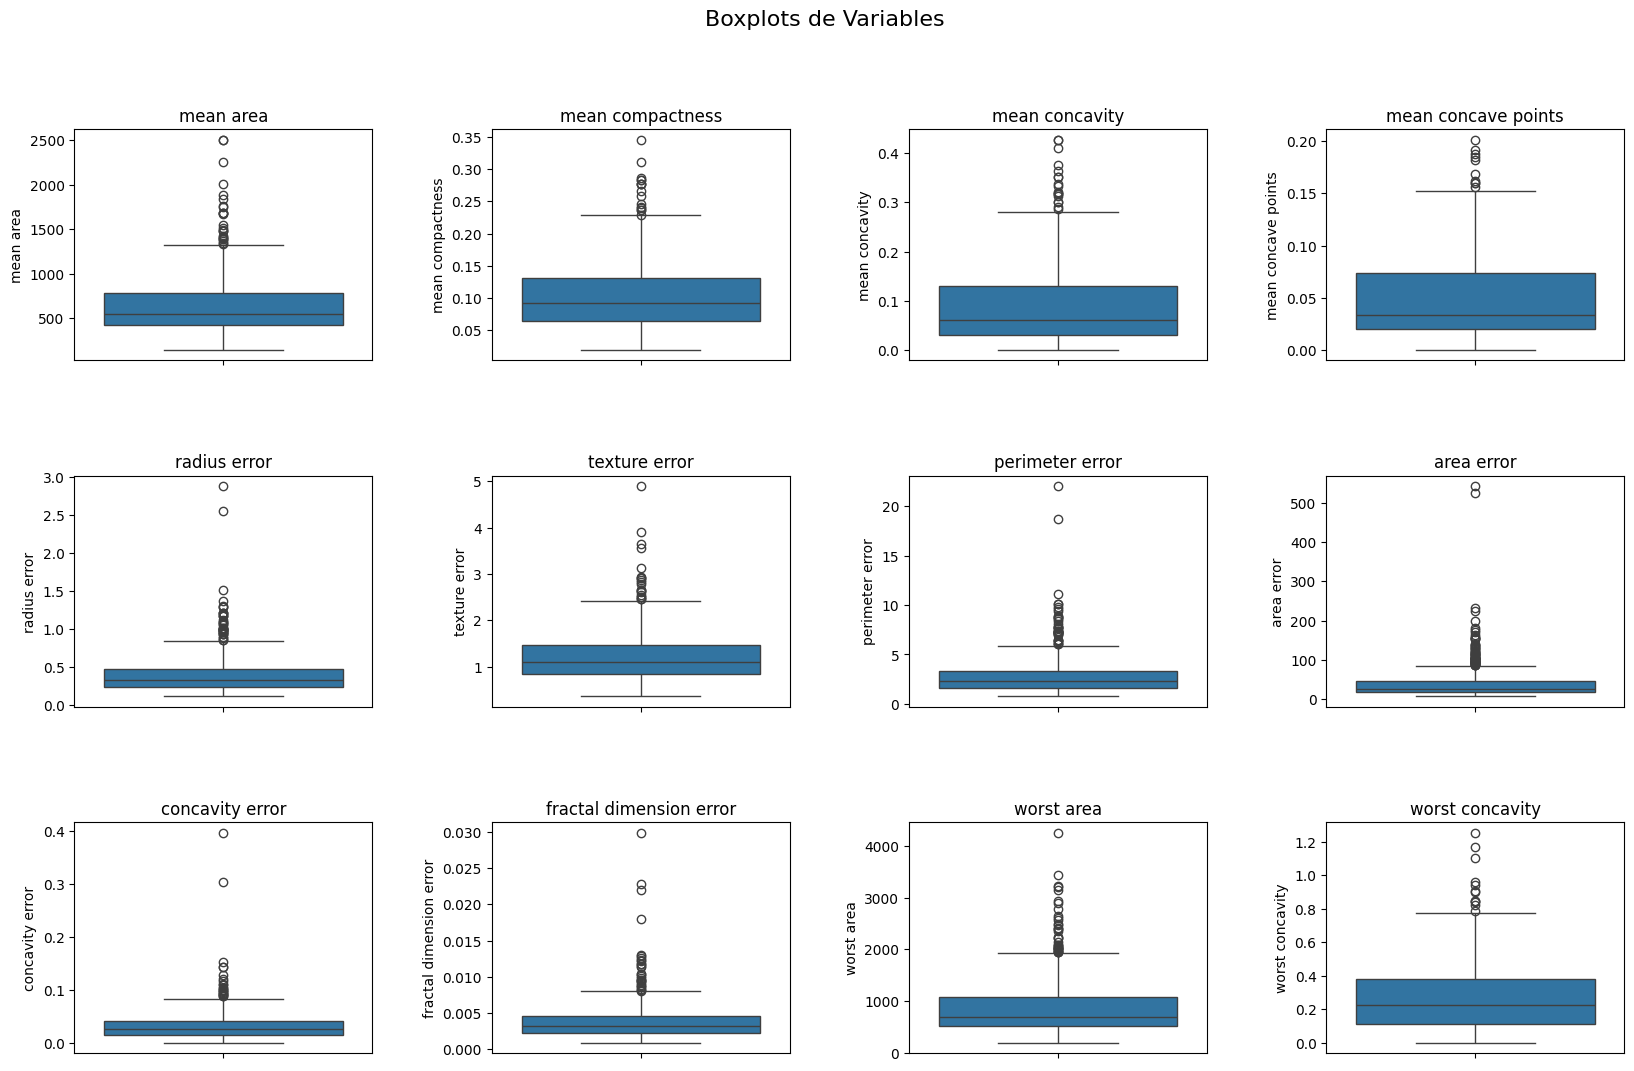

In [6]:
columns = ["mean area", "mean compactness", "mean concavity", "mean concave points", "radius error", "texture error",
           "perimeter error", "area error", "concavity error", "fractal dimension error", "worst area", "worst concavity"]
num_variables = len(columns)
cols = 4
rows = (num_variables + cols - 1) // cols  # se calculan filas necesarias

fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 4))  # se calcula la altura de forma dinámica según 'rows'
fig.suptitle("Boxplots de Variables", fontsize=16)

# se crean los boxplots. Definición de subplots vacíos
for i, column in enumerate(columns):
    row = i // cols
    col = i % cols
    sns.boxplot(data=ca_df, y=column, ax=axes[row, col])
    axes[row, col].set_title(column, fontsize=12)
    axes[row, col].tick_params(axis='y', labelsize=10)  # Etiquetas más pequeñas

# se desactivan subplots vacíos
for j in range(len(columns), rows * cols):
    fig.delaxes(axes.flatten()[j])

# se ajusta espacio entre subplots
plt.subplots_adjust(hspace=0.5, wspace=0.4)

plt.show()


## Correlaciones

Se obtiene la matriz de correlaciones y se grafica utilizando un mapa de calor:

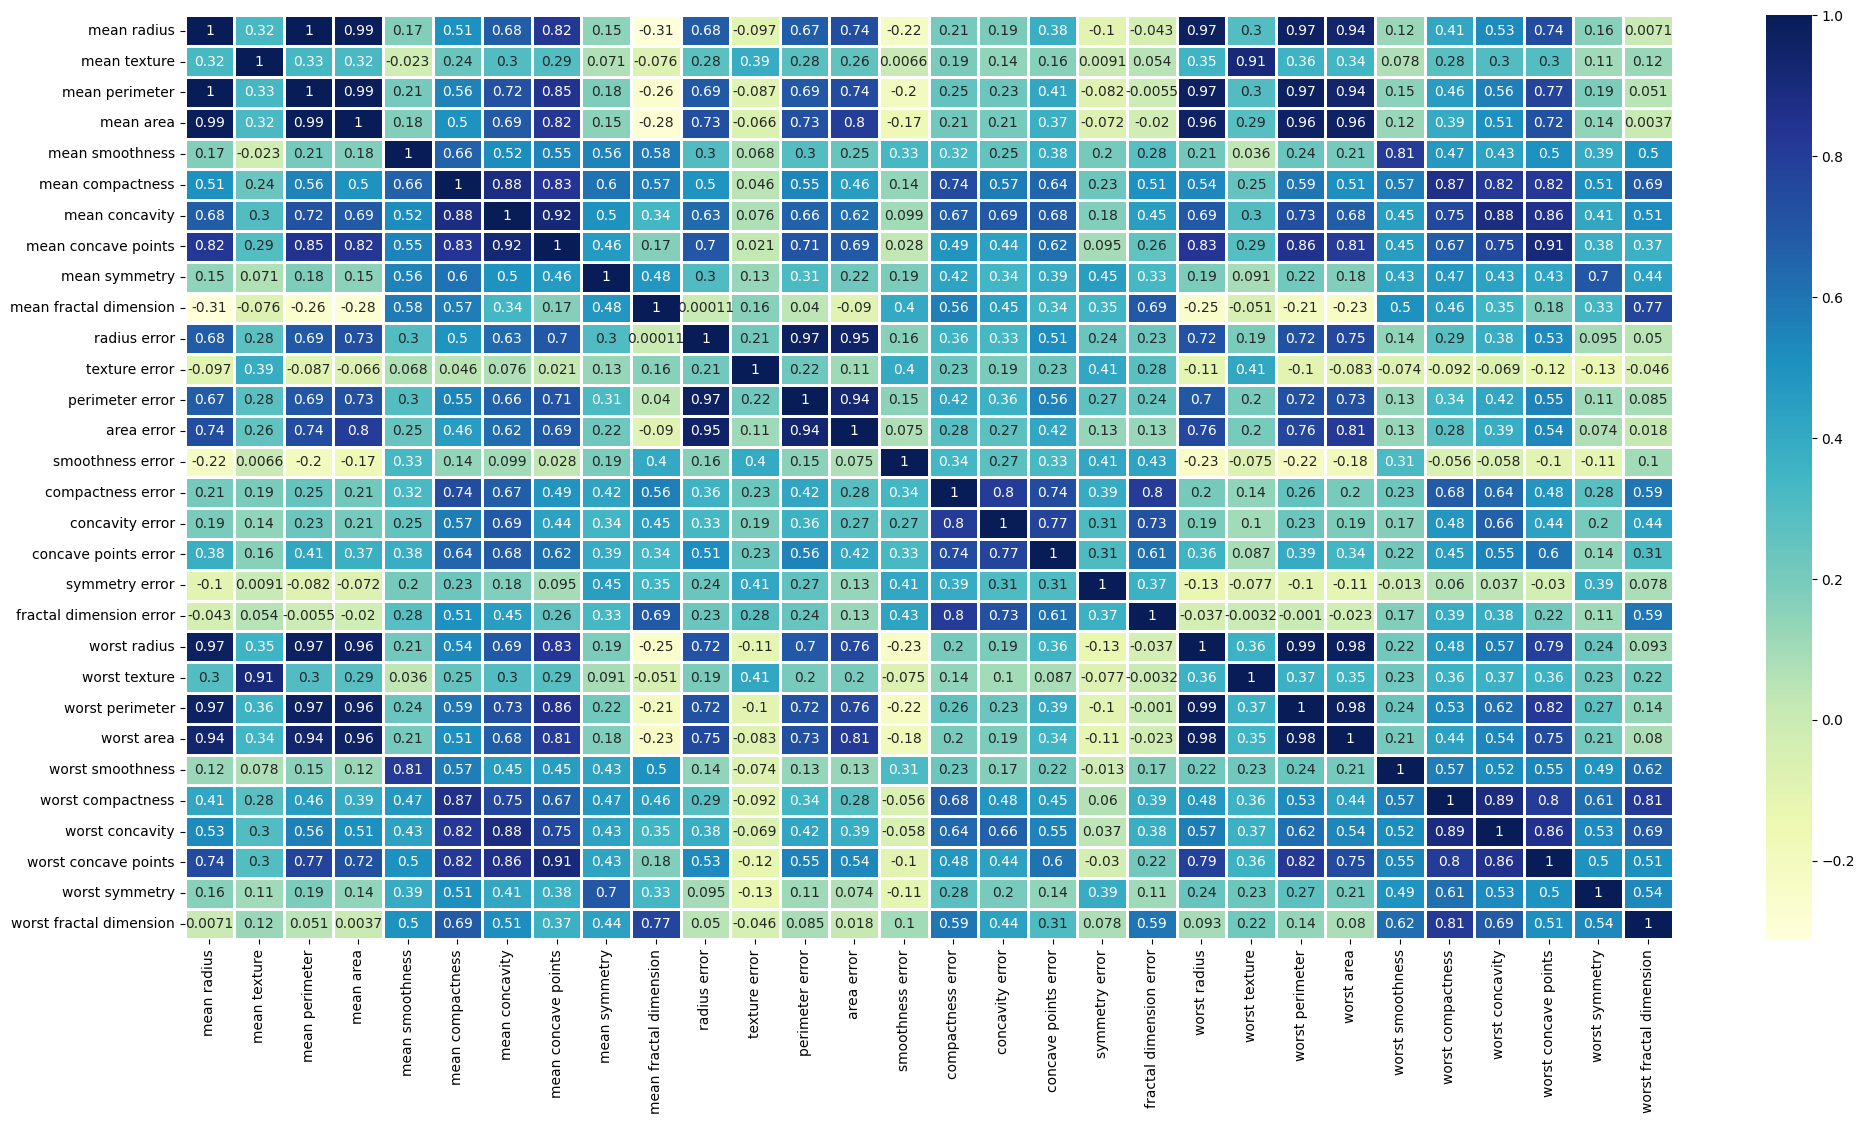

In [7]:
matriz = ca_df.corr()

plt.figure(figsize=(24, 12))
sns.heatmap(matriz, annot=True, linewidths=1, cmap="YlGnBu")
plt.show()

Se observan correlaciones altas (mayor a .7) entre varias de las 30 variables estudiadas, por lo que puede resultar mas efectivo reducir la cantidad utilizando la técnica de PCA.

## Estandarización

Se utiliza el módulo StanderScaler para convertir los puntajes brutos a puntajes Z, con media 0 y ds 1.

In [8]:
scaler = StandardScaler()
scaler.fit(ca_df)

StandardScaler()

In [9]:
# se visualizac el resultado de la estandarización
scaled_data = scaler.transform(ca_df)
scaled_data

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

Se define la cantidad de Componentes Principales que se van a obtener.

Se ajusta el modelo a los datos estandarizados.

In [10]:
numero_componentes = 3
pca = decomposition.PCA(n_components = numero_componentes)
pca.fit(scaled_data)

PCA(n_components=3)

Se obtienen los nuevos valores, correspondientes a las nuevas variables/Componentes principales.

Se grafican en un DataFrama para una mejor visualización.

In [11]:
x_pca = pca.transform(scaled_data)
x_pca_df = pd.DataFrame(x_pca, columns=[f'PC{i+1}' for i in range(numero_componentes)])
x_pca_df.head()

,PC1,PC2,PC3
0,9.192837,1.948583,-1.123166
1,2.387802,-3.768172,-0.529293
2,5.733896,-1.075174,-0.551748
3,7.122953,10.275589,-3.232790
4,3.935302,-1.948072,1.389767


Se obtienen los "loadings" de cada variable original en cada Componente Principal, para conocer el peso o la importancia de cada una en los componentes.

In [12]:
# cálculo y visualización de los loadings
dirs = pd.DataFrame(pca.components_, columns=ca_df.columns, index=[f'PC{i+1}' for i in range(numero_componentes)])
dirs

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
PC1,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
PC2,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339
PC3,-0.008531,0.064550,-0.009314,0.028700,-0.104292,-0.074092,0.002734,-0.025564,-0.040240,-0.022574,...,-0.047507,-0.042298,-0.048547,-0.011902,-0.259798,-0.236076,-0.173057,-0.170344,-0.271313,-0.232791


Se construye un mapa de calor de los componentes, para obtener una mejor visualizaciób:

In [13]:
dire = dirs.iloc[::-1]
fig = go.Figure(data=go.Heatmap(
    z=dire.values,
    x=dire.columns,
        y=dire.index,
        colorscale='Viridis',
        zmin=-1,
        zmax=1,
        colorbar=dict(title='Peso de Componentes')
    ))

for i in range(len(dire.index)):
        for j in range(len(dire.columns)):
            fig.add_annotation(
                x=dire.columns[j],
                y=dire.index[i],
                text=f'{dire.values[i, j]:.2f}',
                showarrow=False,
                font=dict(color="white" if dire.values[i, j] < 0 else "black"),
                xanchor='center',
                yanchor='middle'
            )
fig.update_layout(title='Mapa de Calor de los Componentes Principales', template='plotly_dark')

## Varianza explicada

Se calcula el porcentaje de la variabilidad inicial de los datos que es posible retener luego de la transformación de las variables originales a los Componentes.

In [14]:
# Cálculo de la varianza explicada por cada componente
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

Se grafica la varianza de cada componente y se visualiza la varianza acumulativa:

In [15]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=[f'PC{i+1}' for i in range(len(explained_variance))],
    y=explained_variance,
    name='Individual',
    marker=dict(color='rgba(55, 83, 109, 0.7)')
))

# Línea acumulativa
fig.add_trace(go.Scatter(
    x=[f'PC{i+1}' for i in range(len(cumulative_variance))],
    y=cumulative_variance,
    mode='lines+markers',
    name='Cumulative',
    line=dict(color='rgba(26, 118, 255, 0.7)')
))

# Personalizar layout
fig.update_layout(
    title='Varianza Explicada por PCA',
    xaxis=dict(title='Número de Componentes Principales'),
    yaxis=dict(title='Varianza Explicada'),
    template='plotly_dark',
    showlegend=True,
    bargap=0.2,
    legend=dict(
        x=0.8,
        y=1.15,
        traceorder='normal',
        font=dict(
            size=12,
            color="white"
        ),
        bgcolor="rgba(0,0,0,0)"
    )
)

fig.show()

Los 3 primeros componentes explican el 70% de la variabilidad original de los datos, por lo que se concluye que es posible reducir las 30 variables originales a solo 3 sin perder una cantidad significativa de información.

##Gráfico de dispersión de las primeras 2 componentes

Se agrega la columna "target" que indica el diagnóstico de cada una de las observaciones. Esto va a permitir evaluar la capacidad de discriminación de los datos utilizando solos los dos primeros componentes:

In [16]:
# se agrega nuevamente la columna del target
Y_label = []
for i in cancer_data.target:
    if i == 0:
        Y_label.append('maligno')
    else:
        Y_label.append('benigno')

dx = pd.DataFrame(Y_label, columns = ['type'])
#dx.head()
x_pca_df = pd.concat([x_pca_df, dx], axis = 1)
x_pca_df.head(4)

,PC1,PC2,PC3,type
0,9.192837,1.948583,-1.123166,maligno
1,2.387802,-3.768172,-0.529293,maligno
2,5.733896,-1.075174,-0.551748,maligno
3,7.122953,10.275589,-3.232790,maligno


In [17]:
# se crea el gráfico de dispersión
fig = px.scatter(
    x=x_pca[:, 0],
    y=x_pca[:, 1],
    color = x_pca_df['type'],
    title='Visualización de las Primeras Dos Componentes Principales',
    labels={'x': 'Componente Principal 1', 'y': 'Componente Principal 2', 'color': 'Diagnóstico'})

# Personalizar el gráfico
fig.update_layout(
    template='plotly_dark',
    xaxis_title_font_size=16,
    yaxis_title_font_size=16,
    legend_title_font_size=16,)

Como se evidencia, las 2 primeras Componentes obtenidas permiten discriminar correctamente los registros como "malignos" o "benignos".